# ТВиМС. Лабораторная работа №3

## Вариант 25
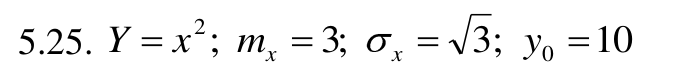

In [197]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [198]:
# globals
sigma = 1.73205
Mx = 3.0

PRESISION = 5

a = Mx - round(1.73205 * sigma, PRESISION)
b = Mx + round(1.73205 * sigma, PRESISION)

N = 200
INTERVALS = int(np.sqrt(N)) if N <= 100 else int(3 * np.log(N))
alpha = 0.01
Xst = 29.1

In [199]:
# getting eps
def eps():
    return np.random.random_sample()

# getting x with eps
def x_func():
    return eps() * (b - a) + a

# getting y with x
def y_func(x):
    return x * x

In [200]:
# generating n variants of y
def get_varseries(n: int):
    ans = []
    for i in range(0, n):
        ans.append(y_func(x_func()))
    ans.sort()
    return ans

# representation
def print_varseries(invs, amounts):
    base_output = "{:<5} {:<30} {:<10}"
    print(base_output.format("N", "Interval", "Amount"))
    num = 0
    for i in range(len(invs)):
        num += 1
        print(base_output.format(
            num, 
            f"({round(invs[i - 1] if i != 0 else 0, PRESISION)}, {round(invs[i], PRESISION)}]", 
            round(amounts[i], PRESISION)
        ))
        
# compaire theory and empirical data
def comp(invs, ams):
    ys, ps = get_theory()
    plt.plot(ys, ps, label="theory", color="red")
    plt.step(invs, ams, label="emirical data", color="blue")
    plt.legend()
    plt.show()

# Теоретический закон распределения

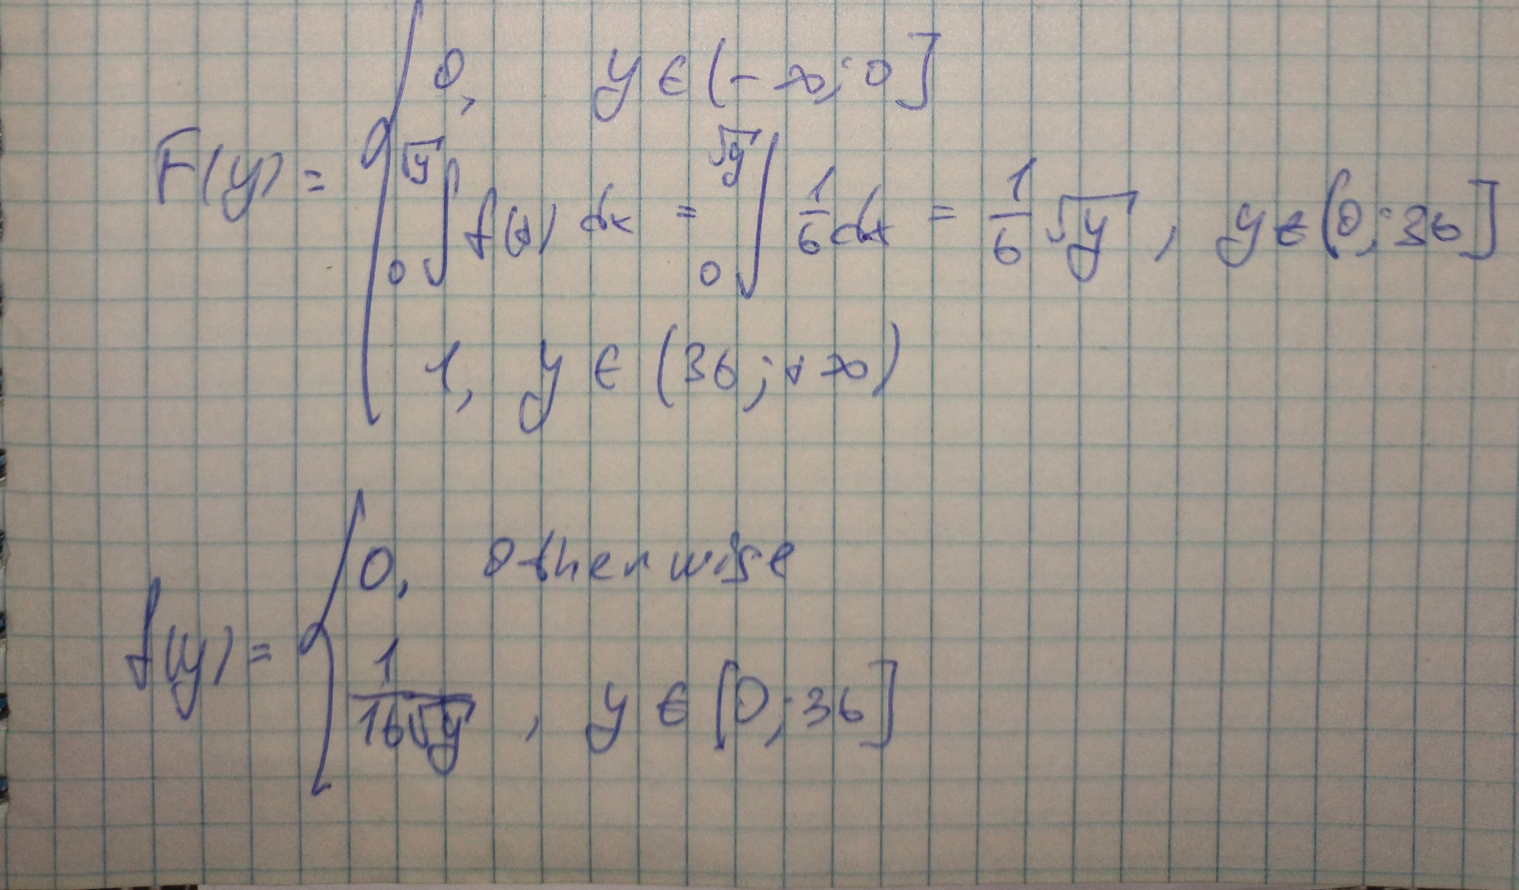

In [201]:
# theoretical distribution density
def theory_density(y):
    if y > 0 and y <= 36:
        return 1.0 / (16 * np.sqrt(y))
    return 0

def theory_distribution(y):
    if y <= 0:
        return 0
    if y <= 36.0:
        return 1/6.0 * np.sqrt(y)
    return 1

def get_theory():
    ys = np.linspace(y_func(a), y_func(b), 1000)
    ps = [theory_density(y) for y in ys]
    return ys, ps

# compare theoretical and empirical distribution
def comp_distrib(freqs):
    ys = np.linspace(y_func(a), y_func(b), 1000)
    plt.plot(ys, [theory_distribution(y) for y in ys], label="theoretical distribution")
    V = len(freqs)
    Ps = [0] + [v / V for v in range(0, V)]
    plt.step([0] + freqs + [y_func(b)], Ps + [1], label="empirical distribution")
    plt.legend()
    plt.show()

## Равновероятностое деление на группы

In [202]:
# equal probabilities
def get_qprob_hist(variants: list):
    xs = [variants[0]]
    ys = [0]
    ps = []
    ai = []
    bi = []
    hs = []
    m = N / INTERVALS
    pi = m / N
#     if N % INTERVALS != 0:
#         m = int(m)
    it = 0
    prv_it = 0
    for i in range(INTERVALS):
        it = int(N * (i + 1) / INTERVALS - 0.5)
        xs.append(variants[it])
        bi.append(variants[it])
        ai.append(variants[prv_it])
        hi = variants[it] - variants[prv_it]
        ys.append(pi / hi)
        hs.append(hi)
        prv_it = it
    xs.append(variants[-1])
    ys.append(0)
    return xs, ys, ai, bi, pi

#  Выдвижение гипотезы
H0: f(x) = 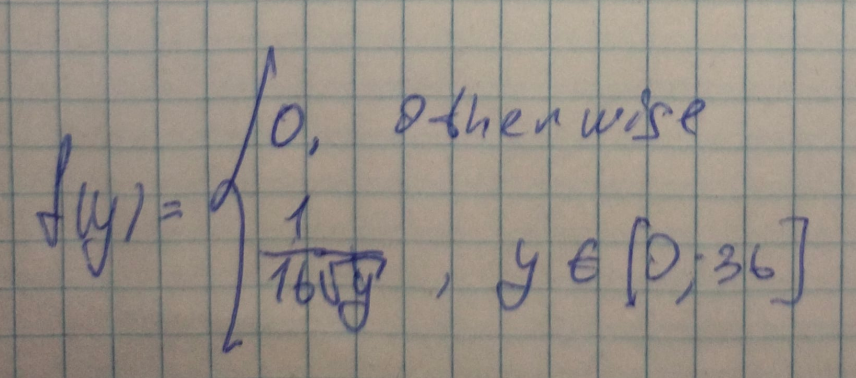

# Критерий "Хи квадрат" Пирсона
## Расчет критерия

In [203]:
# hi squeare calc
def get_hi_by_theory(ai, bi, pe):
    hi = 0
    pi = []
    s = 0
    for i in range(INTERVALS):
        pi.append(theory_distribution(bi[i]) - theory_distribution(ai[i]))
        s += pi[-1]
    control = False
    if abs(1 - s) <= alpha:
        control = True
    print(f"Control {round(abs(1 - s), PRESISION)}<={alpha} - {control}")
    for i in range(INTERVALS):
        hi += (math.pow((pi[i] - pe), 2)) / pi[i]
    hi *= N
    return hi

N     Interval                       Amount    
1     (0, 0.00226]                   0         
2     (0.00226, 0.25699]             0.26171   
3     (0.25699, 0.89032]             0.10526   
4     (0.89032, 1.88214]             0.06722   
5     (1.88214, 3.19403]             0.05082   
6     (3.19403, 6.09675]             0.02297   
7     (6.09675, 7.43951]             0.04965   
8     (7.43951, 8.99877]             0.04276   
9     (8.99877, 11.18048]            0.03056   
10    (11.18048, 12.49135]           0.05086   
11    (12.49135, 14.63551]           0.03109   
12    (14.63551, 17.23903]           0.02561   
13    (17.23903, 22.23071]           0.01336   
14    (22.23071, 26.03782]           0.01751   
15    (26.03782, 30.98914]           0.01346   
16    (30.98914, 35.53642]           0.01466   
17    (35.53642, 35.53642]           0         


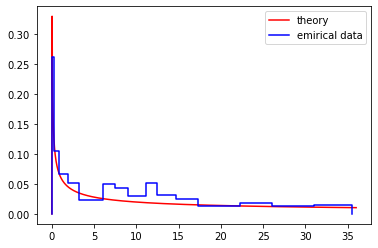

In [204]:
varnts = get_varseries(N)
ei, eam, ai, bi, pe = get_qprob_hist(varnts)
print_varseries(ei, eam)
comp(ei, eam)

In [205]:
k = INTERVALS - 1
hi = get_hi_by_theory(ai, bi, pe)
print(f"Freedoom amount: k = {k}")
print(f"X^2 = {round(hi, PRESISION)}")
print(f"table: X^2({alpha}, {k}) = {Xst}")

Control 0.01438<=0.01 - False
Freedoom amount: k = 14
X^2 = 20.67374
table: X^2(0.01, 14) = 29.1


X^2 < X^2(alpha, k), следовательно нет оснований отвергать гипотезу H0.

# Критерий А. Н. Колмогорова
## Расчет критерия

In [206]:
# max difference
def get_d(ys: list):
    dm = 0
    V = len(ys)
    ps = [v / V for v in range(0, V)]
    for i in range(1, V):
        t = theory_distribution(ys[i])
        d1 = max(abs(t - ps[i]), abs(t - ps[i]))
        if d1 > dm:
            dm = d1
    return dm

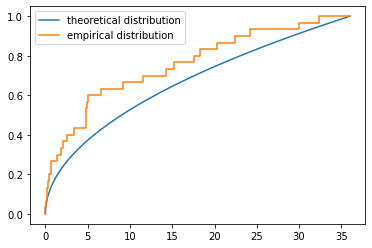

In [207]:
N = 30
varnts = get_varseries(N)
comp_distrib(varnts)

## Вывижение гипотезы
H0: F(x) = 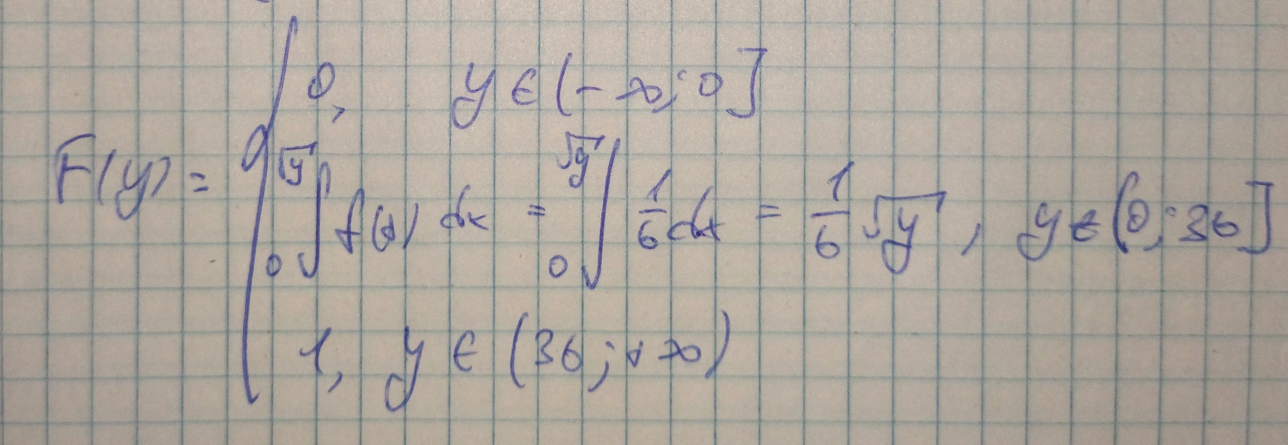

In [208]:
dmax = get_d(varnts)
lam = np.sqrt(N) * dmax
gamma = 1 - alpha
lam_table = np.sqrt(N) * 0.2972
print(f"Max difference - {dmax}")
print(f"Empirical lambda - {lam}")
print(f"Table value of lamba from {N} variants is {lam_table}")

Max difference - 0.19107191623051556
Empirical lambda - 1.0465439862519084
Table value of lamba from 30 variants is 1.6278314409053538


# Критерий Мизеса
## Расчет критерия

In [209]:
def mez(xs: list):
    mz = 1/(12 * N)
    for i in range(N):
        mz += pow(theory_distribution(xs[i]) - (i + 0.5)/N, 2)
    return mz


In [210]:
N = 50
xs = get_varseries(N)
mx = mez(xs)
mx_table = 0.774
print(mx)
print(mx_table)

0.13763859972774226
0.774
